#Grupo:

*   Marcelo Leopoldino dos Santos
*   Ramon Leôncio


## Análise 1


Utilize a fonte de dados Sales_Transactions_Dataset_Weekly.csv fornecida no exercicio. Considerando que este banco de dados contém o valor de transações em vendas de alguns produtos durante 52 semanas.

Colunas do Banco de Dados:

*   Product_Code: código do produto
*   W[0-51]: valor de transação da semana

Realizar os seguintes processos de análises:

1- Transforme o data frame do formato wide para long (Aplicar função para transformar o dado W[0-51] em dia da semana disponibilizada no arquivo week_day.py)

In [12]:
## Analise 1

#Exercicio 1

import pandas as pd
import matplotlib.pyplot as plt
from os import chdir # Comentar caso não utilize o Colab

#Acesso as pastas do GDrive
from google.colab import drive #Comentar caso não utilize o Colab
drive.mount('/content/gdrive') #Comentar caso não utilize o Colab

#Configurando caminho de acesso as pastas do GDrive no Colab (adicionar o caminho completo)
chdir('/content/gdrive/My Drive/University/PUC-MG/IA/Python/Notebooks/Analise1') #Comentar caso não utilize o Colab
df = pd.read_csv('Sales_Transactions_Dataset_Weekly.csv') #Se não utilizar o Colab colocar o arquivo CSV e o script  week_day.py no mesmo diretorio

#Importando o arquivo
df = pd.read_csv('Sales_Transactions_Dataset_Weekly.csv')

#Importando Função de Transformar semana em dias
from week_day import transform_to_date

# Transformação do DataFrame em Long
df_long = pd.melt(df, id_vars=['Product_Code'], value_vars=[f'W{i}' for i in range(52)], var_name='Week', value_name='Transaction_Value')

# Aplicar a função week_to_day diretamente na coluna Week
df_long['Day_of_Week'] = df_long['Week'].apply(transform_to_date)

print(df_long)

Drive already mounted at /content/gdrive; to attempt to forcibly remount, call drive.mount("/content/gdrive", force_remount=True).
      Product_Code Week  Transaction_Value Day_of_Week
0               P1   W0                 11  2022-01-01
1               P2   W0                  7  2022-01-01
2               P3   W0                  7  2022-01-01
3               P4   W0                 12  2022-01-01
4               P5   W0                  8  2022-01-01
...            ...  ...                ...         ...
42167         P815  W51                  0  2022-12-24
42168         P816  W51                  5  2022-12-24
42169         P817  W51                  3  2022-12-24
42170         P818  W51                  0  2022-12-24
42171         P819  W51                  1  2022-12-24

[42172 rows x 4 columns]


2- Escolha três produtos (de forma aleatória; pode utilizar semente) e construa um gráfico com o valor de transação de cada um dos produtos selecionados ao longo do tempo.

['P267', 'P465', 'P263']


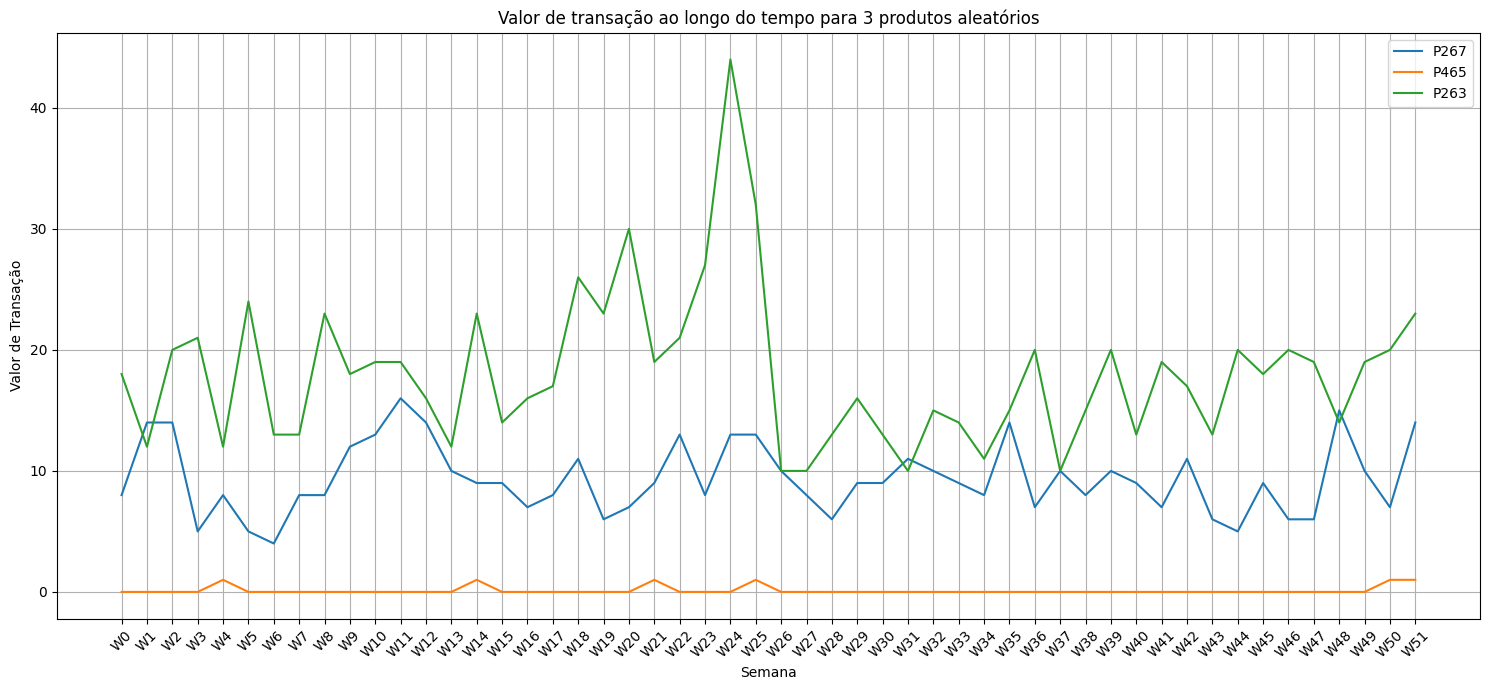

In [13]:
#Exercicio 2

# Escolher três produtos aleatórios
random_seed = 25  # definindo uma semente para gerar a aleatoriedade
random_products = df["Product_Code"].sample(3, random_state=random_seed).tolist()

print(random_products)

# Gerar gráfico
plt.figure(figsize=(15,7))
for product in random_products:
    subset = df_long[df_long["Product_Code"] == product]
    plt.plot(subset["Week"], subset["Transaction_Value"], label=product)

plt.title("Valor de transação ao longo do tempo para 3 produtos aleatórios")
plt.xlabel("Semana")
plt.ylabel("Valor de Transação")
plt.legend()
plt.grid(True)
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()


3- Por produto calcule a diferença entre as semanas e gere um gráfico da série temporal da diferença ao longo das semanas.

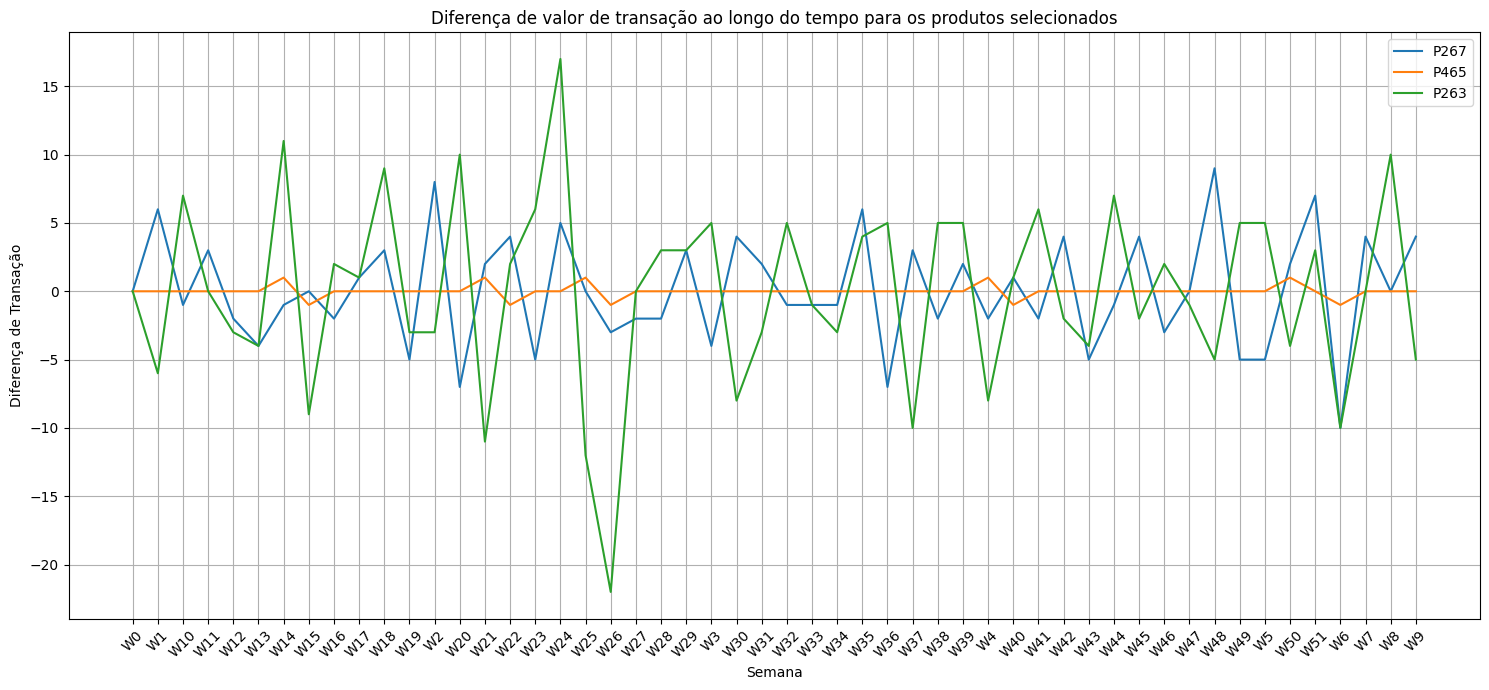

In [14]:
#Exercicio 3

# Calcular a diferença entre as semanas para cada um dos produtos selecionados
df_long = df_long.sort_values(by=["Product_Code", "Week"])
df_long["Difference"] = df_long.groupby("Product_Code")["Transaction_Value"].diff().fillna(0)

# Gerar o gráfico
plt.figure(figsize=(15,7))

for product in random_products:
    subset = df_long[df_long["Product_Code"] == product]
    plt.plot(subset["Week"], subset["Difference"], label=product)

plt.title("Diferença de valor de transação ao longo do tempo para os produtos selecionados")
plt.xlabel("Semana")
plt.ylabel("Diferença de Transação")
plt.legend()
plt.grid(True)
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

4- Calcule as descritivas de cada produto (média, desvio-padrão, mínimo, mediana, máximo)

In [15]:
#Exercicio 4

# Filtrar o dataframe original para incluir apenas os produtos selecionados
df_filtered = df[df['Product_Code'].isin(random_products)].drop(columns="Product_Code")

# Calcule as estatísticas descritivas para cada produto
descriptive_stats = df_filtered.transpose().describe().loc[['mean', 'std', 'min', '50%', 'max']]

# Renomeando a linha '50%' para 'median'
descriptive_stats = descriptive_stats.rename(index={'50%': 'median'})

# Renomeando as colunas para os respectivos Product Codes
descriptive_stats.columns = random_products

print(descriptive_stats)

             P267       P465      P263
mean     9.484151   4.991981  0.122642
std     10.446701   5.002723  0.329584
min      0.000000   0.000000  0.000000
median  10.000000   4.000000  0.000000
max     44.000000  16.000000  1.000000


5- Calcule a média móvel de cada 3 semanas e gere um gráfico contendo as médias móveis de um produto.

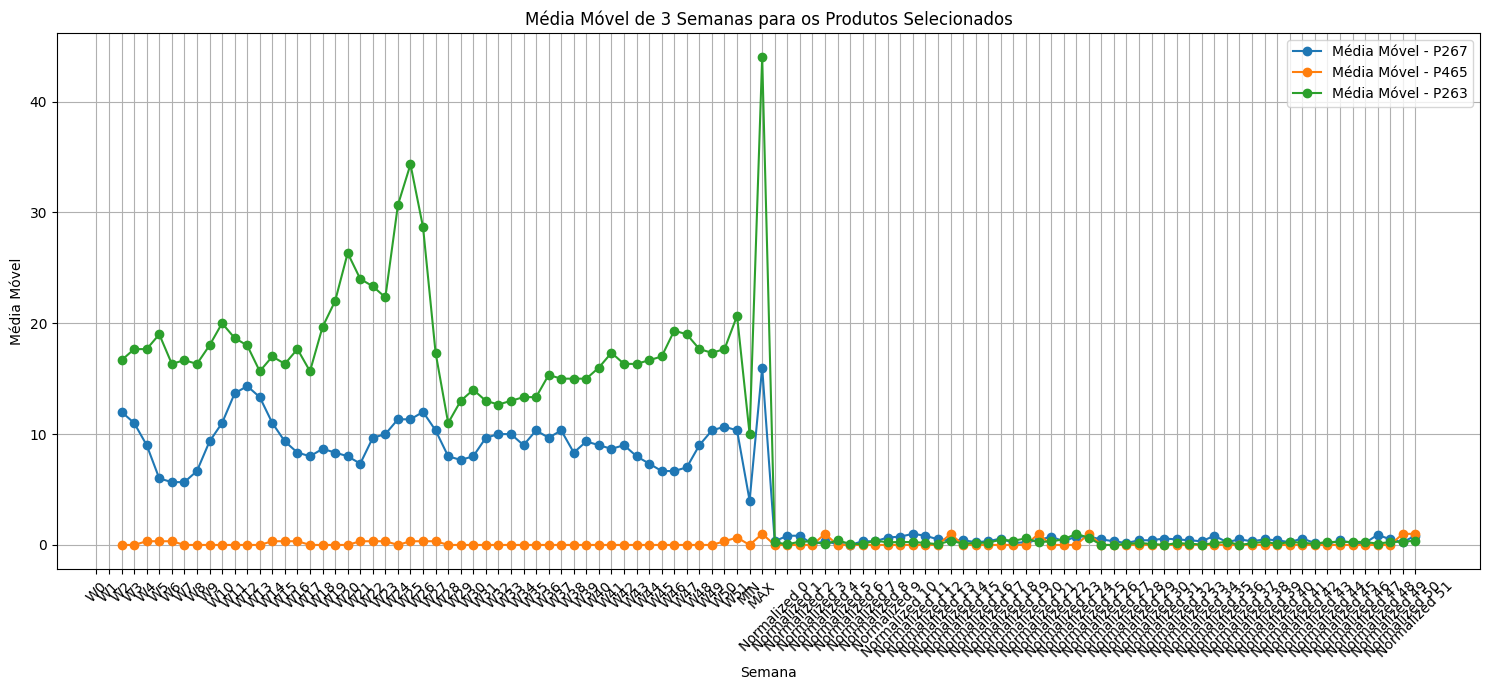

In [16]:
#Exercicio 5

# Calcule a média móvel de 3 semanas diretamente no dataframe original
window_size = 3
df_moving_avg = df[df["Product_Code"].isin(random_products)].copy()
for product in random_products:
    df_moving_avg.loc[df_moving_avg["Product_Code"] == product, [f'W{i}' for i in range(52)]] = df_moving_avg[df_moving_avg["Product_Code"] == product].iloc[:, 1:].rolling(window=window_size, axis=1).mean()

# Gerar gráfico das médias móveis para os três produtos
plt.figure(figsize=(15,7))

for product in random_products:
    subset = df_moving_avg[df_moving_avg["Product_Code"] == product]
    plt.plot(subset.columns[1:], subset.iloc[0, 1:].values, '-o', label=f'Média Móvel - {product}')

plt.title('Média Móvel de 3 Semanas para os Produtos Selecionados')
plt.xlabel('Semana')
plt.ylabel('Média Móvel')
plt.xticks(rotation=45)
plt.legend()
plt.grid(True)
plt.tight_layout()
plt.show()